# Preparing Data For RNN

In [1]:
from pandas import read_csv 
from sklearn.metrics import mean_squared_error
import numpy as np

In [2]:
#usecols = [1], just use 1st columns 
df = read_csv('international-airline-passengers.csv', usecols=[1])
df.describe()

,International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


In [3]:
#fetch values from dataframe
values = df.values.astype('float32')
values.shape

(144, 1)

# Split into Train and Test Set

In [5]:
train_size = int((values.shape[0] * 0.67))  # 2/3rd as training data
test_size = values.shape[0]  - train_size
train = values[0:train_size]
test = values[train_size:]

# Feature Scaling using MinMaxScaler

In [6]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range =(0,1))  # scale in range of 0 to 1
train = scaler.fit_transform(train)
test = scaler.transform(test)

# Create dataset (window size k(lookback) and next value as the output)

In [7]:
def create_dataset(data, k):
    dataX, dataY = [],[]
    for i in range(data.shape[0] - k):
        x = data[i:i + k, 0]
        y = data[i + k, 0]
        dataX.append(x)
        dataY.append(y)
    return np.array(dataX), np.array(dataY)

In [8]:
look_back = 12
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [9]:
trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = np.reshape(testX, (testX.shape[0], testX.shape[1], 1))
print(trainX.shape)
testX.shape

(84, 12, 1)


(36, 12, 1)

# Setting up the RNN Model

In [10]:
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN

Using TensorFlow backend.


In [11]:
model = Sequential()
model.add(SimpleRNN(4, input_shape=(look_back, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam',metrics = ['mse'])
history = model.fit(trainX, trainY, epochs=20, batch_size = 1)


Epoch 1/20
84/84 [==============================] - 2s 20ms/step - loss: 0.3528 - mse: 0.3528
Epoch 2/20
84/84 [==============================] - 1s 10ms/step - loss: 0.0515 - mse: 0.0515
Epoch 3/20
84/84 [==============================] - 1s 9ms/step - loss: 0.0226 - mse: 0.0226
Epoch 4/20
84/84 [==============================] - 1s 9ms/step - loss: 0.0186 - mse: 0.0186
Epoch 5/20
84/84 [==============================] - 1s 9ms/step - loss: 0.0152 - mse: 0.0152
Epoch 6/20
84/84 [==============================] - 1s 11ms/step - loss: 0.0137 - mse: 0.0137
Epoch 7/20
84/84 [==============================] - 1s 10ms/step - loss: 0.0119 - mse: 0.0119
Epoch 8/20
84/84 [==============================] - 1s 9ms/step - loss: 0.0108 - mse: 0.0108
Epoch 9/20
84/84 [==============================] - 1s 9ms/step - loss: 0.0100 - mse: 0.0100
Epoch 10/20
84/84 [==============================] - 1s 10ms/step - loss: 0.0093 - mse: 0.0093
Epoch 11/20
84/84 [==============================] - 1s 8ms/ste

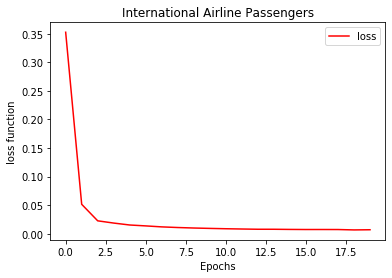

In [17]:
from matplotlib import pyplot as plt
# plot metrics
plt.plot(history.history['loss'],label='loss',color='red')
plt.xlabel("Epochs")
plt.ylabel("loss function")
plt.title("International Airline Passengers")
plt.legend()
plt.show()

# Analysing the Output

In [18]:
testPredict = model.predict(testX)
testPredict = scaler.inverse_transform(testPredict).ravel()

trainPredict = model.predict(trainX)
trainPredict = scaler.inverse_transform(trainPredict).ravel()

testTrue = scaler.inverse_transform([testY]).ravel()
trainTrue = scaler.inverse_transform([trainY]).ravel()

testPredict.shape, testTrue.shape

((36,), (36,))

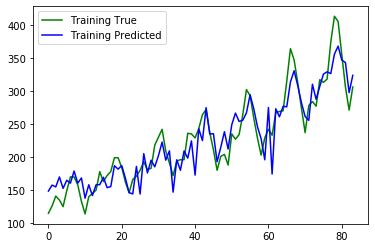

In [19]:
plt.plot(trainTrue, label = 'Training True', c = 'g')
plt.plot(trainPredict, label = 'Training Predicted', c = 'b')
plt.legend()
plt.show()

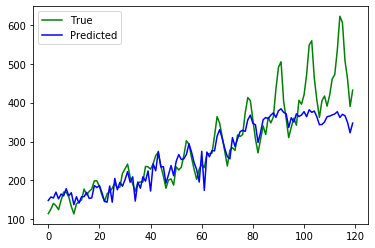

In [20]:
combinedPredicted = np.concatenate((trainPredict, testPredict))
combinedTrue = np.concatenate((trainTrue, testTrue))
plt.plot(combinedTrue, label = 'True', c = 'g')
plt.plot(combinedPredicted, label = 'Predicted', c = 'b')
plt.legend()
plt.show()

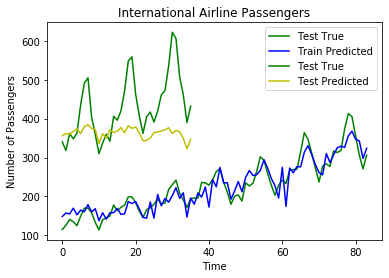

In [21]:
# Final Graph
plt.plot(trainTrue, label = 'Test True', c = 'g')
plt.plot(trainPredict, label = 'Train Predicted', c = 'b')

testTrue
plt.plot(testTrue, label = 'Test True', c = 'g')
plt.plot(testPredict, label = 'Test Predicted', c = 'y')
plt.xlabel("Time")
plt.ylabel("Number of Passengers")
plt.title("International Airline Passengers")
plt.legend()
plt.show()

In [22]:
import math
from sklearn.metrics import mean_squared_error
trainscore=math.sqrt(mean_squared_error(trainY,trainPredict))
print('Train Score: %.2f MSE' % (trainscore))
testscore=math.sqrt(mean_squared_error(testY,testPredict))
print('Test Score: %.2f MSE' % (testscore))

Train Score: 233.20 MSE
Test Score: 362.54 MSE
